<a href="https://colab.research.google.com/github/StephanieO-jpg/Titanic-survival-and-Spam-predictions/blob/master/Titanic_Survival_prediction_model_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

> Royal Mail Ship (RMS) Titanic,(commonly known as the titanic)is British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. It is arguably one of the most famous tragedies in modern history. It inspired numerous stories, several films, a musical and for  us data scientists, a dataset. It has been the subject of much scholarship and scientific speculation.

<img src 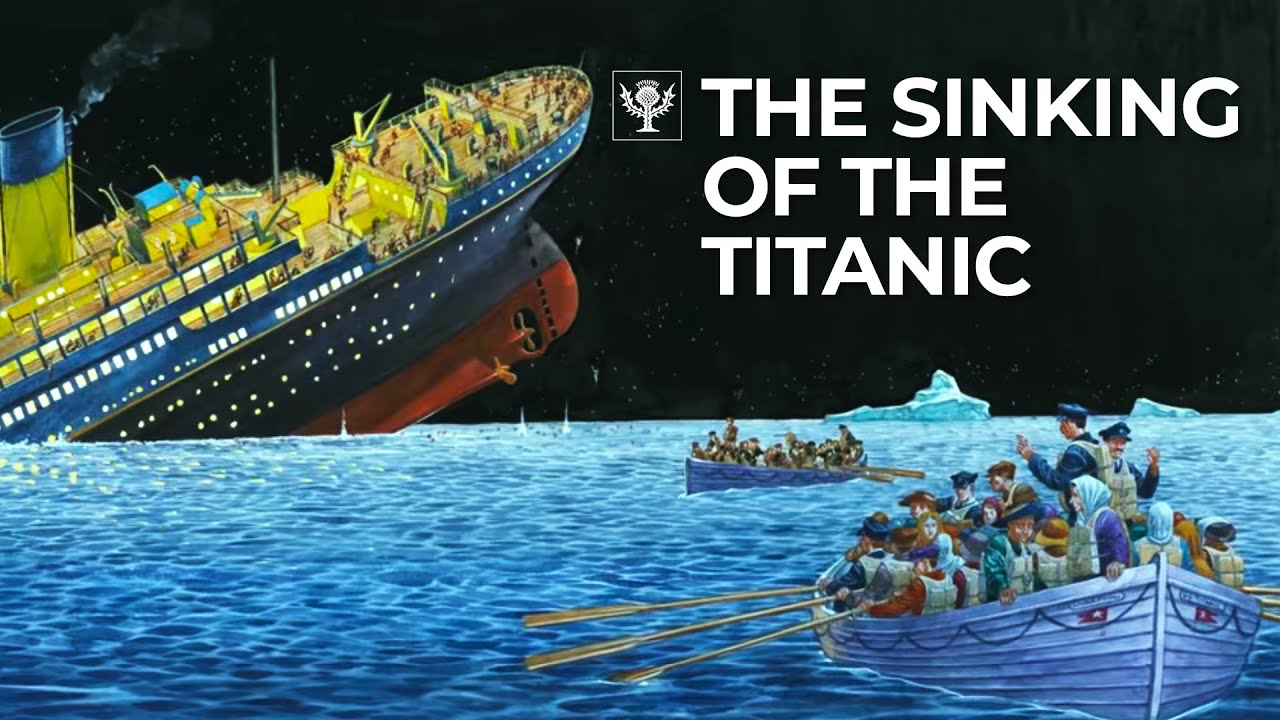 />

# Problem Statement 



> Using K-Nearest Neighbors and Bayes Classifier, make predictions on whether or not a passanger survived the wreck on that fateful day.



# Understanding the context

#### Data Description


Below is the desciption of the features in the dataset.


| Features      |       Description|
|---|---|
|Survived    | Survived : 0 = No, 1 = Yes|
| Pclass     | Ticket Class : 1 = 1st, 2 = 2nd, 3 = 3rd|
| Sex        | Sex|
| Age        | Age in years|
| sibsp| Number of siblings or spouses aboard the Titanic|
| Parch | Number of parents or children aboard the Titanic|
| Ticket | Ticket Number|
| Fare | Passenger Fare|
| Cabin | Cabin Number|
| Embarked | Port of Embarkation : C = Cherbourg, Q = Queenstown, S = Southampton|

# Reading the data

In [0]:
# importing libraries needed for that analysis
import pandas as pd
# allows us to read our files and organize them in tabular form
import numpy as np
# numpy allows us to work with multi dimensional arrays
import scipy
# scipy-a python ecosystem used for mathematics, machine learning 
import matplotlib.pyplot as plt
# matplotlib - a 2D library used to plot numpy computations
import seaborn as sns
# seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
import sklearn
# sklearn-used for machine learning, 
%matplotlib inline
# for visualization 
import statsmodels.api as sm
# statsmodel-used to run regression


# Machine Learning libraries

from sklearn.model_selection import train_test_split    # Used to split the data into the training and testing sets
from sklearn.preprocessing import StandardScaler        # Used to scale the data through normalization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score              # Used as a metric for evaluation
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB   
      # used for Gaussian Classifier

from sklearn.naive_bayes import MultinomialNB
# used fro Multinomial classifier

from sklearn.naive_bayes import BernoulliNB
# used for Bernoulli classifier


import warnings
warnings.filterwarnings('ignore')                       # Used to ignore the warnings displayed by python

In [0]:
# previewing the dataset

wreck = pd.read_csv('train.csv')
wreck.take(np.random.permutation(len(wreck))[:15])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C


In [0]:
# Describing the data 

wreck.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [0]:
#  checking the datatypes
wreck.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Checking for the unique values in the dataset per column
# I will use a loop to iterate through the columns and output the number of unique values and the values.

# 
for x in wreck.columns:
  
  print(x, ':' , wreck[x].nunique())
  print(wreck[x].unique(), '\n')

PassengerId : 891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

* It has been noted that the columns passengerid, name and ticket are of high cardinality  as they contain a larger number of unique features. They will therefore be dropped later on before creating the model to avoid the 'curse of dimensionality'.

In [0]:
# for uniformity purposes , we will change all column names to lower case


wreck.columns = wreck.columns.str.lower()

wreck.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [0]:
# checking for duplicates
wreck.duplicated().sum()

0

In [0]:
# check for null values 

wreck.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

* There are missing values in the age, cabin and embarked columns. Let's see how passenger age is related to their class as a passenger on the boat so as to understand how to go about imputation.

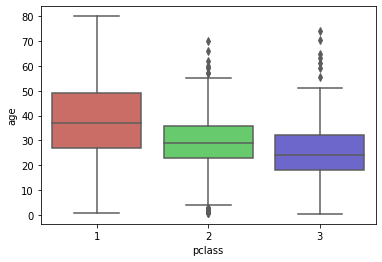

In [0]:
# a boxplot visualization showig the relation between the age and class of a passenger

sns.boxplot(x='pclass', y='age', data=wreck, palette='hls')



*   From the box plot, it looks like the average age of 1st class passengers is about 38, 2nd class passengers is 29, and 3rd class pasengers is 25.
*   It can be noted that a younger person is more likely to be a 3rd class passenger whereas older people are 1st class passengers


*   Because there is very sparse relationship between the variables , I will write a function that approximates a passengers age, based on their class





In [0]:
# create a function that finds each null value in the Age variable, and for each null.
# the function checks the value of the Pclass and assigns an age value according to the average age of passengers in that class
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [0]:
# apply the function 
wreck['age'] = wreck[['age', 'pclass']].apply(age_approx, axis=1)

# check if the function has worked 
wreck.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# Exploratory Data Analysis 

>  This is where we explore the data so as to:
*  maximize insights on the data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop models with great explanatory predictive power
* determine optimal factor settings


> Here we will perform :
* univariate analysis
* bivariate analysis 
* multivariate analysis

## Univariate analysis

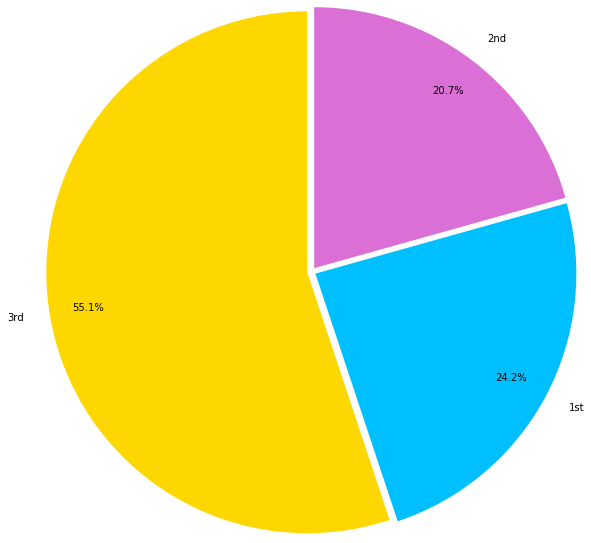

In [0]:
# Checking the proportion of travellers in for the passenger class aboard

class_pie = wreck['pclass'].value_counts()


#sns.set_style('darkgrid')

labels = ['3rd', '1st', '2nd']
colors = ['gold', 'deepskyblue', 'orchid']
explode = [0.05, 0.05, 0.05]

# Creating the pie chart
plt.pie(class_pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 3)
plt.show()

<function matplotlib.pyplot.tight_layout>

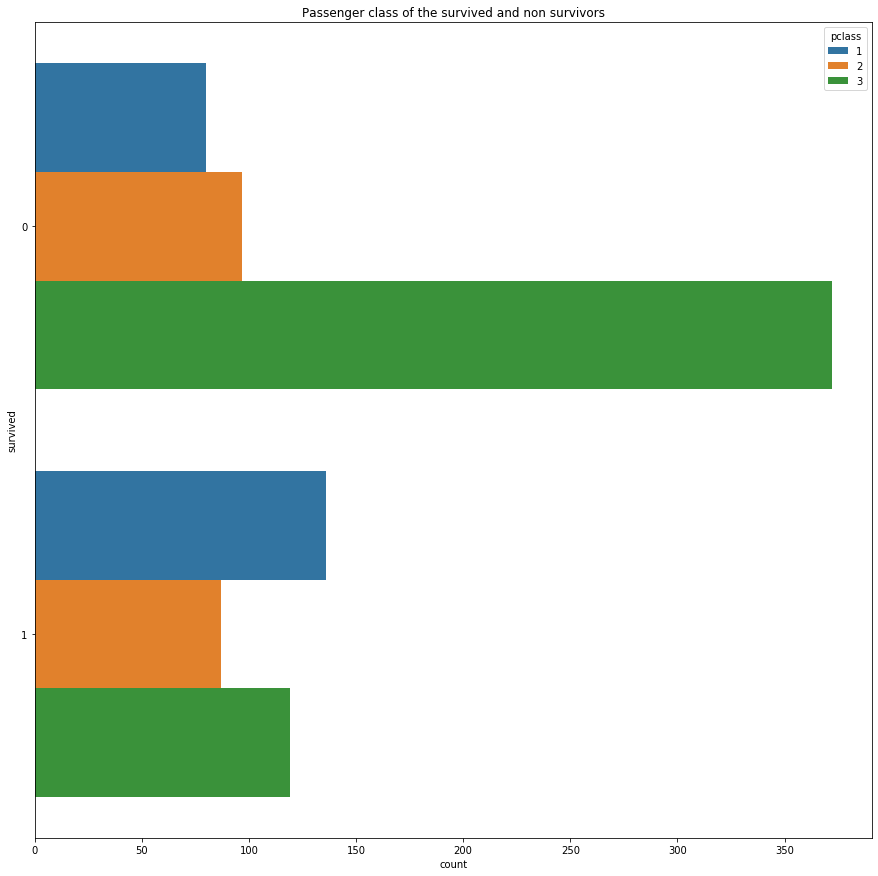

In [0]:
# visualizing the survivors
# 0=no,1=yes
# 

ax = plt.subplots(figsize = (15,15))

sns.countplot(y = 'survived', hue = 'pclass', data = wreck)

plt.title('Passenger class of the survived and non survivors')

plt.tight_layout



*   the third class passengers are seen to have the greatest number of fatalities



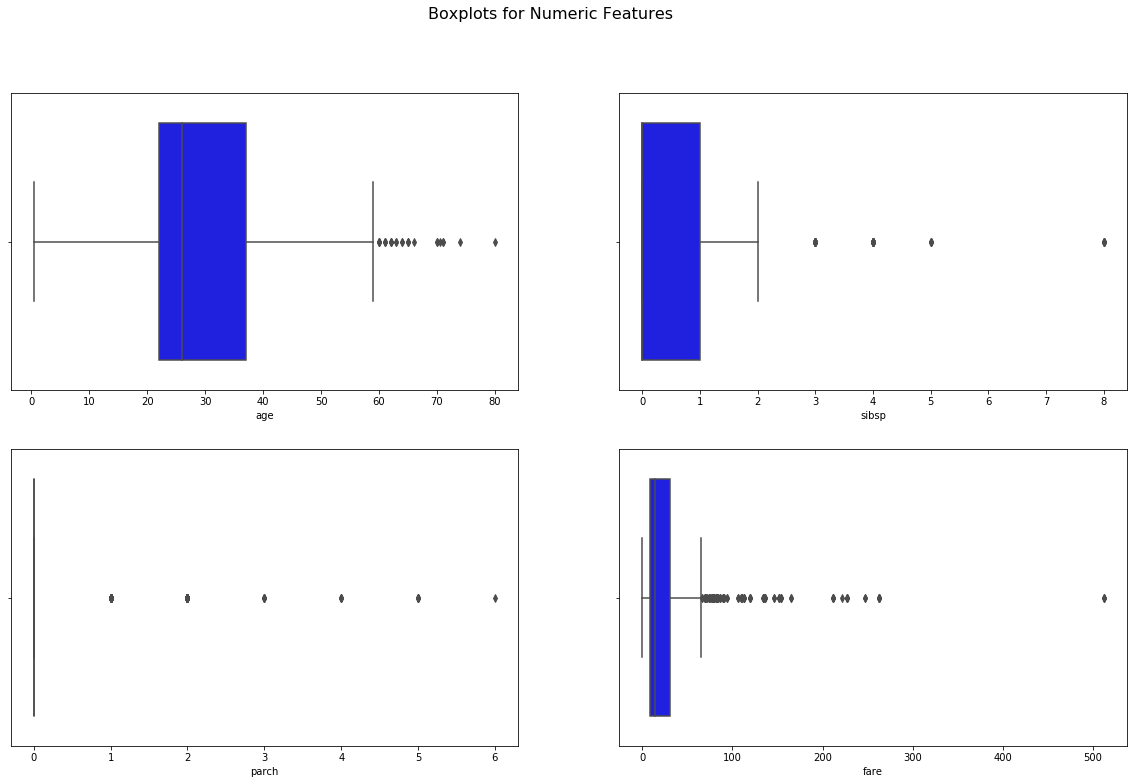

In [0]:
# Outliers

numeric = ['age', 'sibsp', 'parch', 'fare']


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))
for ax, data, name in zip(axes.flatten(), wreck, numeric):
  sns.boxplot(wreck[name], color = 'blue', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

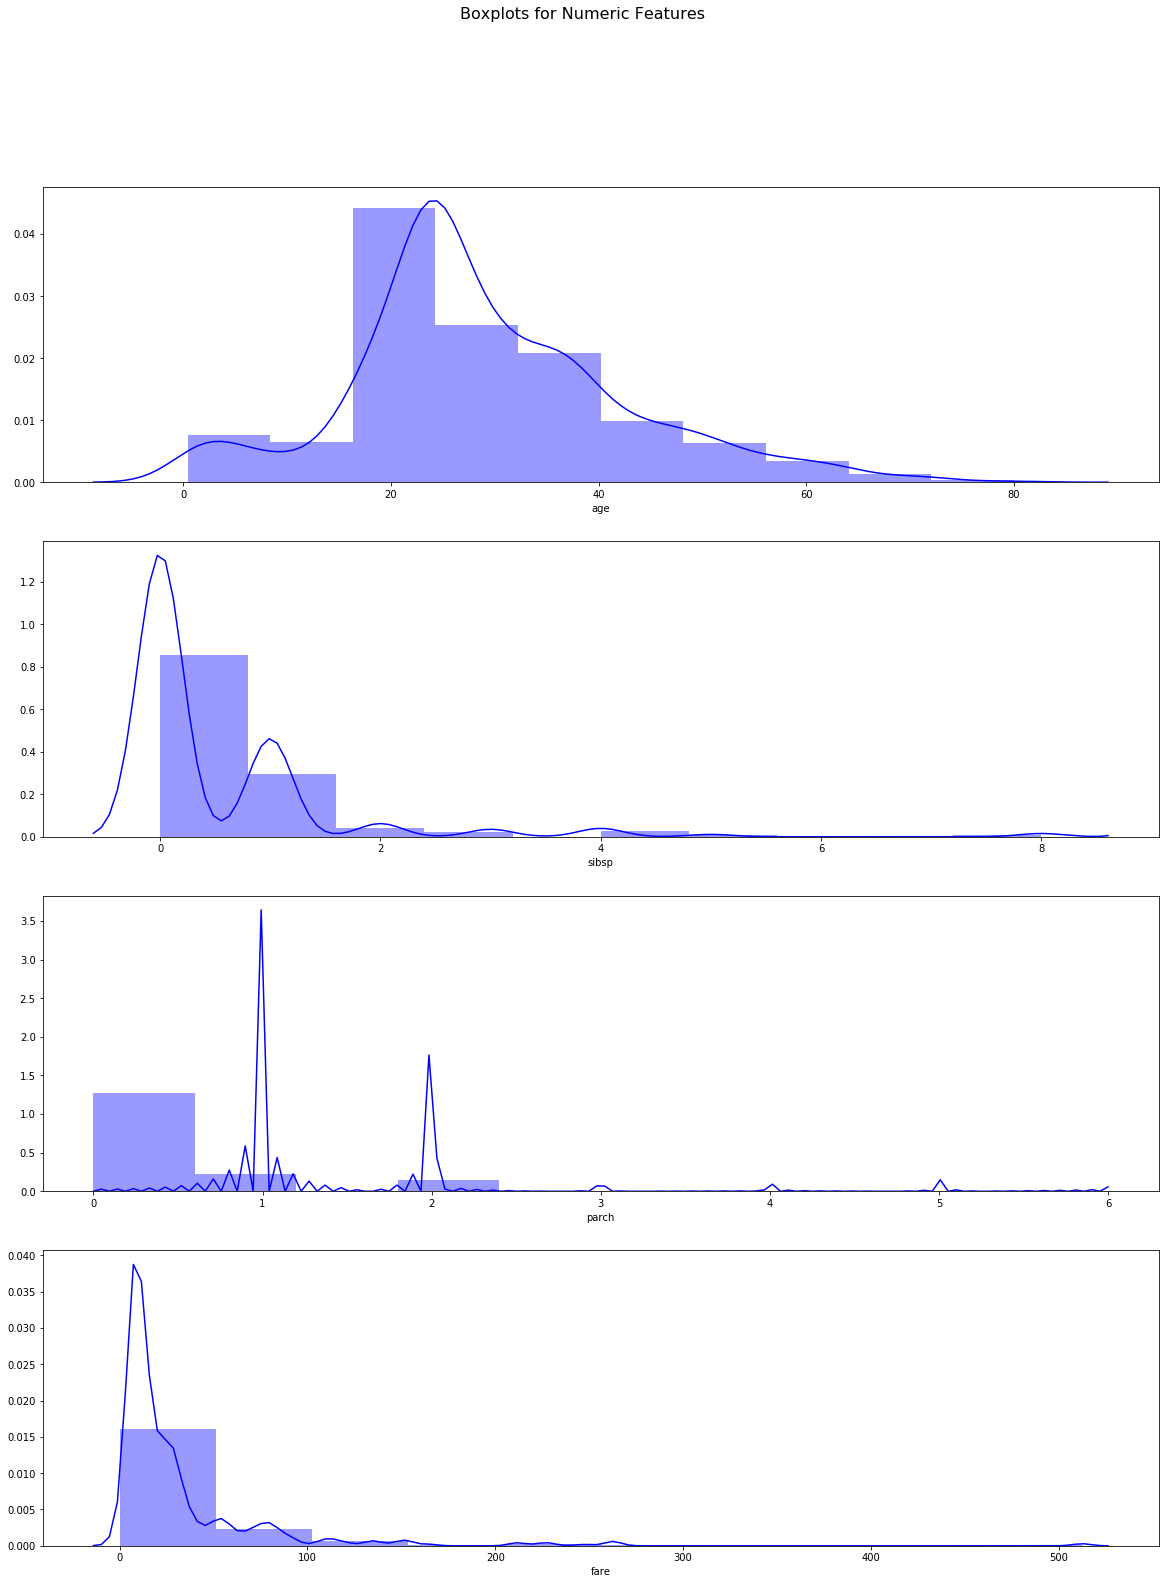

In [0]:
# Checking the distribution of our data using distribution plots

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 25))

for ax, name, data in zip(axes.flatten(), numeric, wreck):
  sns.distplot(wreck[name], hist = True, ax = ax, bins = 10, color = 'blue')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

In [0]:
# drop irrelevant columns
wreck.drop(columns = ['name', 'passengerid', 'cabin', 'ticket', 'sibsp', 'parch','fare'], axis = 1 , inplace = True)

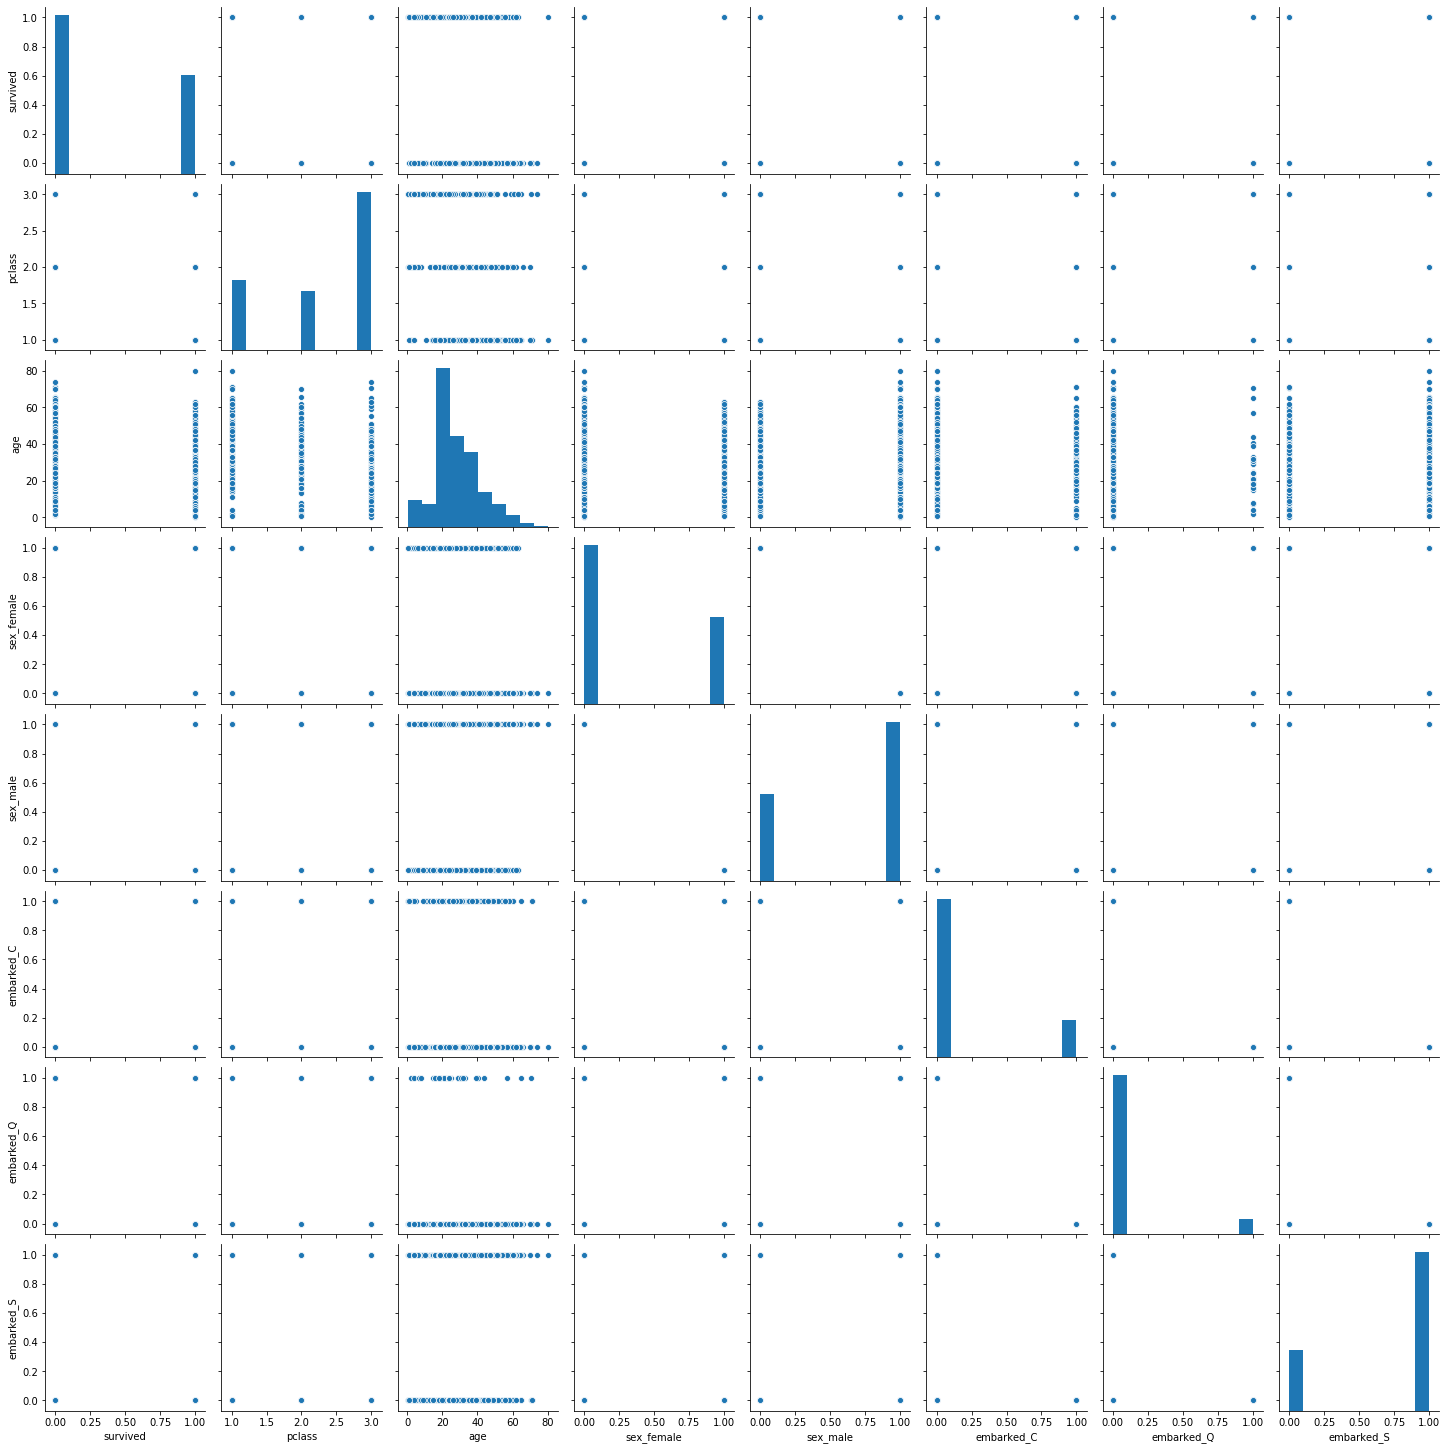

In [0]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(wreck, kind = 'scatter', dropna = False)
plt.tight_layout
plt.show()

# Baseline Model

In [0]:
# Convert categorical variable into dummy/indicator variables
columns = ['sex','embarked']

wreck = pd.get_dummies(wreck, columns=['sex','embarked'])
wreck.head()

,survived,pclass,age,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,1,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,1,0,0,1


In [0]:
# Defining our independent and dependent variables

X = wreck.drop(['survived'], axis=1)
y = wreck.survived

In [0]:
# Splitting the data into train and test sets
# partitioning the data into 80-20 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



*   I will perform feature scaling so as to ensure there is uniformity during evaluation before making predictions




In [0]:
# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

[[102   8]
 [ 22  47]]
The accuracy score of the model is : 0.8324022346368715




*   When the data is partitioned into an 80-20 split the accuracy is at 87% and the f1 score is 83% .




In [0]:
# Splitting the data into train and test sets
# partitioning the data into 70-30 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       168
           1       0.75      0.65      0.70       100

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.79      0.78       268

[[146  22]
 [ 35  65]]
The accuracy score of the model is : 0.7873134328358209




*   When the data is partitioned into an 70-30 split the accuracy score reduces to 84% and the f1 scores is at 79% .




In [0]:
# Splitting the data into train and test sets
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       221
           1       0.72      0.62      0.67       136

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.74       357
weighted avg       0.76      0.76      0.76       357

[[188  33]
 [ 51  85]]
The accuracy score of the model is : 0.7647058823529411




*    When the data is partitioned into an 60-40 split the accuracy score is 76% and and 82% is the f1 score

> * The best split to use us seen to be 80-20 split, as it has the best accuracy score

> * Bottom line is the accuracy level of the model is still not what was expected, we need a higher accuracy level. We will perform some hyperparameter tuning to improve the model








## Hyperparameter Tuning

In [0]:
#hyper-parameter tune our model to improve accuracy. We will use the grid search.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', clf.fit(X_train,y_train))

best parameters: GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [0]:
#fittting our model with the best parameters
clf2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#predictin with model.
y_pred = clf.predict(X_test)

#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.7843137254901961


* The accuracy score has reduced after tuning the model with sugtgest parameters

# Conclusion



*   The dataset we have been given needs more flesh, i.e safety precautions taken like number of life jackets on the boat as well as the number of life boats provided. We also needed to know whether someone died due to the extreme water temprature or did they drown due to lack of experience


